In [1]:
# ALGUNOS LINKS INTERESANTES
# Sección de sklearn sobre Clustering
# https://scikit-learn.org/stable/modules/clustering.html#clustering
# habla un poco más sobre el método del codo y de la silueta
# https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/
# Para qué segmentar clientes desde punto de vista del marketing
# https://datapeaker.com/big-data/resuelva-la-segmentacion-de-clientes-con-aprendizaje-automatico/
# Animación que ilustra como el algoritmo hace la segmentación
# https://miro.medium.com/max/617/1*pwCAVEzTCi22Ihto234ZlA.gif
# Documentación oficial de SkLearn sobre Kmeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# cómo rotar el gráfico 3d
# https://stackoverflow.com/questions/49981313/rotate-interactively-a-3d-plot-in-python-matplotlib-jupyter-notebook
# Interesante artículo sobre métricas para determinar el nro de clusters
# https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd


%matplotlib inline
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from google.colab import files
import warnings


warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\n1,Male,19,15,39\n2,Male,21,15,81\n3,Female,20,16,6\n4,Female,23,16,77\n5,Female,31,17,40\n6,Female,22,17,76\n7,Female,35,18,6\n8,Female,23,18,94\n9,Male,64,19,3\n10,Female,30,19,72\n11,Male,67,19,14\n12,Female,35,19,99\n13,Female,58,20,15\n14,Female,24,20,77\n15,Male,37,20,13\n16,Male,22,20,79\n17,Female,35,21,35\n18,Male,20,21,66\n19,Male,52,23,29\n20,Female,35,23,98\n21,Male,35,24,35\n22,Male,25,24,73\n23,Female,46,25,5\n24,Male,31,25,73\n25,Female,54,28,14\n26,Male,29,28,82\n27,Female,45,28,32\n28,Male,35,28,61\n29,Female,40,29,31\n30,Female,23,29,87\n31,Male,60,30,4\n32,Female,21,30,73\n33,Male,53,33,4\n34,Male,18,33,92\n35,Female,49,33,14\n36,Female,21,33,81\n37,Female,42,34,17\n38,Female,30,34,73\n39,Female,36,37,26\n40,Female,20,37,75\n41,Female,65,38,35\n42,Male,24,38,92\n43,Male,48,39,36\n44,Female,31,39,61\n45,Female,49,39,28\n46,Female,24,39,65\n47,Female,50,40,55\n48,Female,27,40,47\n4

In [3]:
df_mall = pd.read_csv('Mall_Customers.csv')

print(df_mall.shape)
print(df_mall.columns)
#['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
df_mall

(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df_mall.tail(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
#      en ppio no nos interesan el género ni el número de cliente

df_mall.drop(columns=['Gender', 'CustomerID'], inplace=True)

#    veamos los primeros 5 registros
print(df_mall[:5])



   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


For n_clusters=2, The Silhouette Coefficient is 0.293166070535953
For n_clusters=3, The Silhouette Coefficient is 0.3839349967742105
For n_clusters=4, The Silhouette Coefficient is 0.40546302077733304
For n_clusters=5, The Silhouette Coefficient is 0.44446409171786105
For n_clusters=6, The Silhouette Coefficient is 0.4523443947724053
For n_clusters=7, The Silhouette Coefficient is 0.4398198217929885
For n_clusters=8, The Silhouette Coefficient is 0.42972734733510815
For n_clusters=9, The Silhouette Coefficient is 0.4146548644815721
For n_clusters=10, The Silhouette Coefficient is 0.38286907361970324


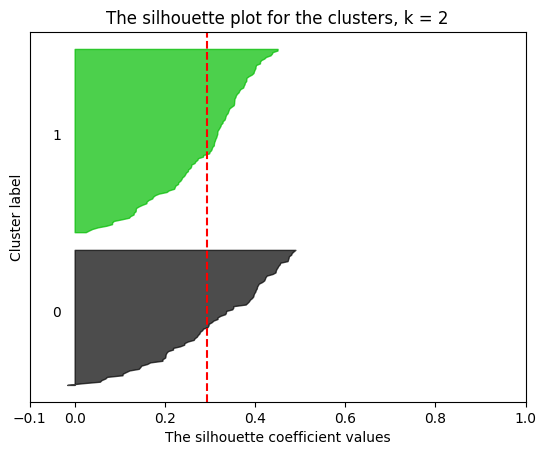

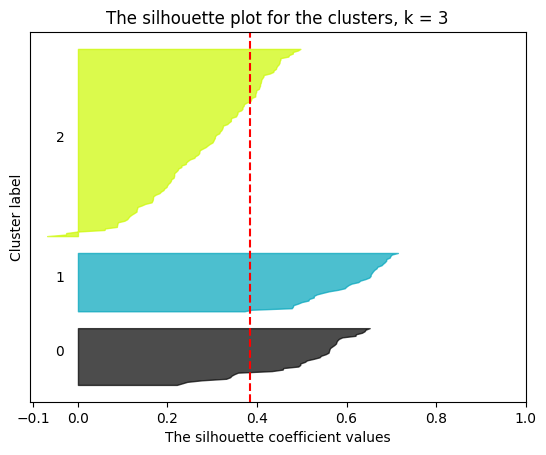

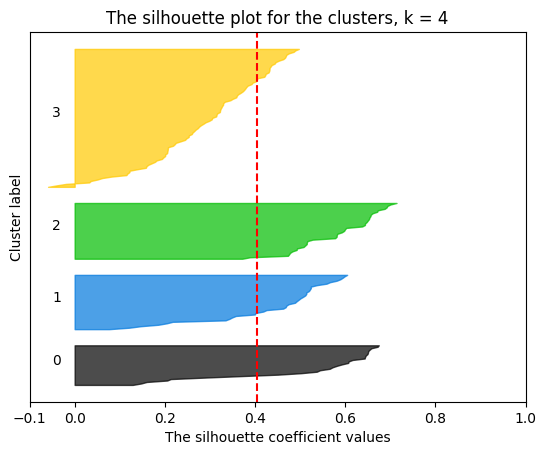

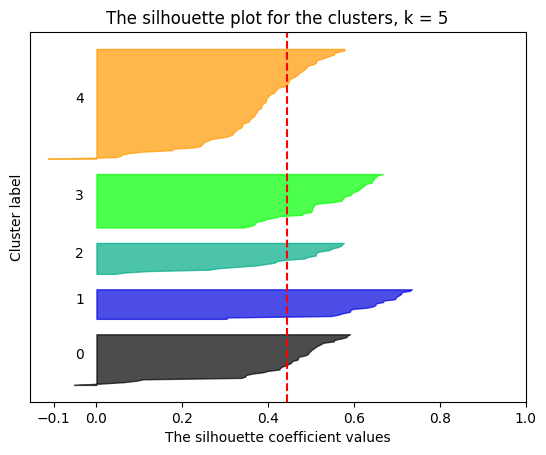

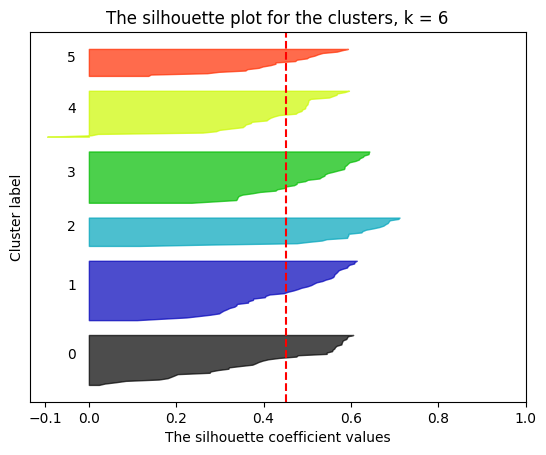

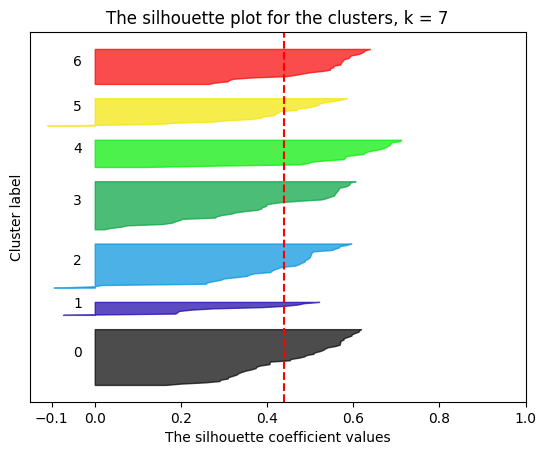

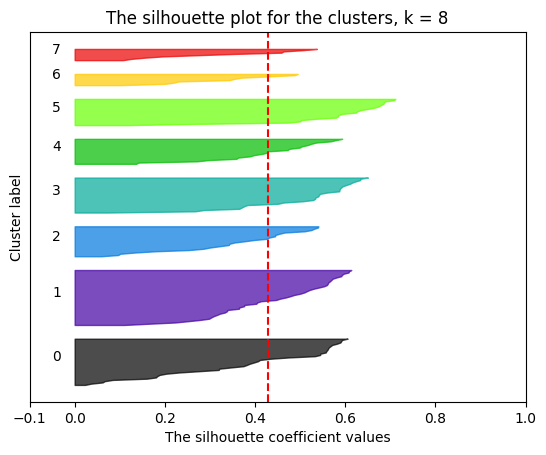

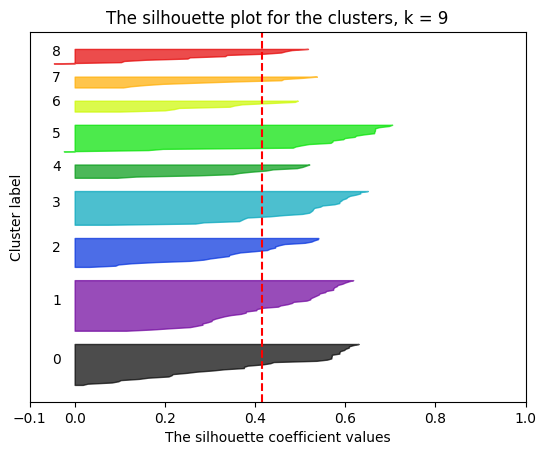

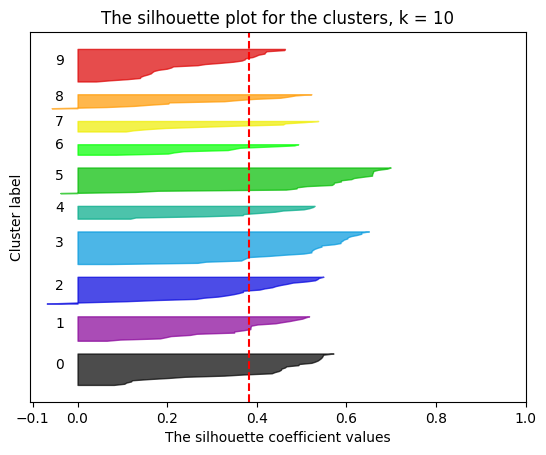

In [7]:
'''
K-Means Hyperparameters
* n_clusters = the numbers of clusters we want
* init: differents initializations, create differents solutions
    * random: choose n observations random from data and create the first
    centroids
    * k-means++: select initial clusters
    * An array with the data that you want to start the initial centers of the
    clusters
* n_init: the number of times that the k-means will run with differente initial
 centers
* max_iter: maximun number of iterations per single run of the algorithm
* tol: The threshold of tolerance which mean that the difference of the
centroids between one interation and the next one have to be less than this
parameter
* precomputed_distances: True/False, if True the algorithm will be faster.
 This parameter change the way to compute the distance
* copy_x:
* algorithm: is the algorithm that kmeans will use, could be:
    * auto: kmeans select automatically the algorithm
    * elkan: not support spar
'''

# elijamos k usando el método de la silueta, queremos el máximo
wcss=[]
for n_cluster in range(2, 11):
    km = KMeans(n_clusters=n_cluster, init='k-means++', random_state=5)
    preds = km.fit_predict(df_mall)
    sil_coeff = silhouette_score(df_mall, preds, metric='euclidean')
    print(f"For n_clusters={ n_cluster}, The Silhouette Coefficient is {sil_coeff}")
    wcss.append(km.inertia_)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_mall, preds)

    fig=plt.figure()
    y_lower = 10
    for i in range(n_cluster):
    # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[preds == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_cluster)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title(f"The silhouette plot for the clusters, k = {n_cluster}")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=sil_coeff, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


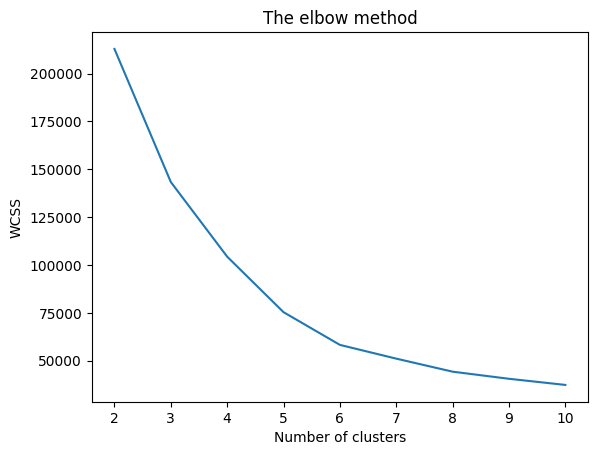

In [8]:
# graficamos el método del codo
plt.plot(range(2,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')   # within cluster sum of squares
plt.show()


In [9]:
#  planteamos nuestro modelo con 6 clusters y lo hacemos clasificar

km = KMeans(n_clusters=6, n_init=100, max_iter=1000, init='k-means++', random_state=5)
pred = km.fit_predict(df_mall)

#  cómo asignó a los clientes su clase?

print(pred)

[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 1 2 1 0 5 2 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 3 0 3 4 3 4 3 4 3 0 3 4 3 4 3 4 3 4 3 0 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


In [11]:
#     veamos cómo quedó la clasificación, usamos plotly para graficar
fig = px.scatter_3d(data_frame=df_mall, x="Age", y="Annual Income (k$)", z= 'Spending Score (1-100)', width=1000, height=800, color=pred)
fig.show()



In [ ]:
# veamos los centroides
print('              CENTROIDES')
print('    EDAD        INGRESOS     %GASTADO')
print(km.cluster_centers_)

df_mall['preds'] = pred
df_mall.head(10)
# agregamos la clasificación al dataset y lo dejamos listo para uso posterior

              CENTROIDES
    EDAD        INGRESOS     %GASTADO
[[25.27272727 25.72727273 79.36363636]
 [56.15555556 53.37777778 49.08888889]
 [41.68571429 88.22857143 17.28571429]
 [32.69230769 86.53846154 82.12820513]
 [27.         56.65789474 49.13157895]
 [44.14285714 25.14285714 19.52380952]]


,Age,Annual Income (k$),Spending Score (1-100),preds
0,19,15,39,5
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5
5,22,17,76,0
6,35,18,6,5
7,23,18,94,0
8,64,19,3,5
9,30,19,72,0
